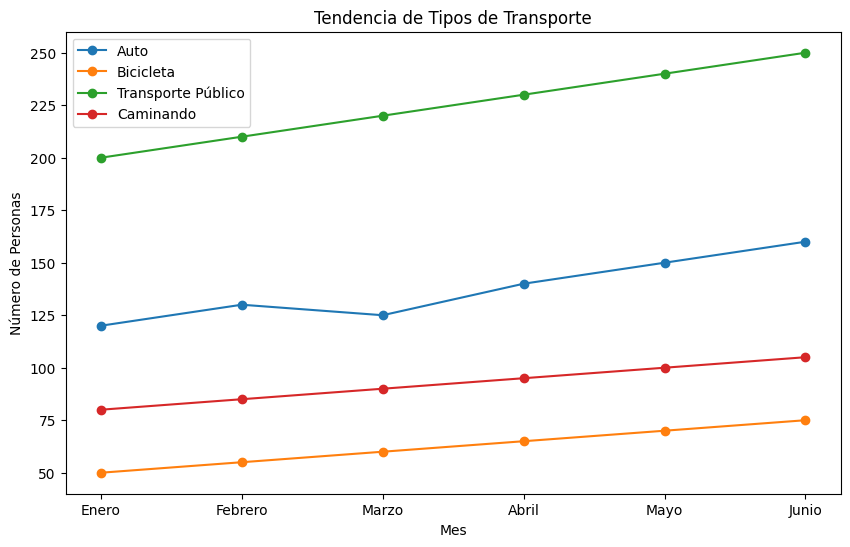

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

# Datos de muestra
data = {
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio'],
    'Auto': [120, 130, 125, 140, 150, 160],
    'Bicicleta': [50, 55, 60, 65, 70, 75],
    'Transporte Público': [200, 210, 220, 230, 240, 250],
    'Caminando': [80, 85, 90, 95, 100, 105]
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Graficar cada tipo de transporte
for column in df.columns[1:]:
    plt.plot(df['Mes'], df[column], marker='o', label=column)

# Añadir título y etiquetas
plt.title('Tendencia de Tipos de Transporte')
plt.xlabel('Mes')
plt.ylabel('Número de Personas')
plt.legend()

# Mostrar el gráfico
plt.show()

In [66]:
import pandas as pd

df = pd.read_excel('./datasets/crime.xlsx', sheet_name='crime')

df.head(2)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Vehicle Collision or Pedestrian Struck (with I...,2017,4,13,9,9,W 10TH AVE / DISCOVERY ST,West Point Grey,485229.0,5456795.0,49.263740,-123.203022
1,Vehicle Collision or Pedestrian Struck (with I...,2017,6,28,4,13,W 4TH AVE / NW MARINE DR,West Point Grey,485455.0,5457353.0,49.268765,-123.199936


In [67]:
df.groupby('NEIGHBOURHOOD').count()['TYPE'].sort_values(ascending=False).head(5)

NEIGHBOURHOOD
Central Business District    4887
West End                     1360
Mount Pleasant               1077
Renfrew-Collingwood           944
Grandview-Woodland            882
Name: TYPE, dtype: int64

In [70]:
tipos = ['Break and Enter Commercial', 'Break and Enter Residential/Other',
    'Other Theft', 'Theft from Vehicle', 'Theft of Vehicle'
       ]
df = df[df.TYPE.isin(tipos) ]

In [71]:
# Agrupar por 'NEIGHBOURHOOD' y 'TYPE' y contar la cantidad de crímenes
crime_counts_by_type = df.groupby(['NEIGHBOURHOOD', 'TYPE']).size().unstack(fill_value=0)

# Seleccionar las 5 ciudades con mayor cantidad de crímenes
top_5_cities = crime_counts_by_type.sum(axis=1).sort_values(ascending=False).head(5).index
top_5_crime_counts = crime_counts_by_type.loc[top_5_cities]

top_5_crime_counts

TYPE,Break and Enter Commercial,Break and Enter Residential/Other,Other Theft,Theft from Vehicle,Theft of Vehicle
NEIGHBOURHOOD,,,,,
Central Business District,281,76,1253,2111,56
West End,105,38,324,535,57
Mount Pleasant,112,53,215,331,59
Renfrew-Collingwood,36,68,236,328,63
Grandview-Woodland,64,82,153,281,58


In [72]:
# Calcular el porcentaje de crímenes por tipo en cada ciudad
crime_counts_by_type_pct = top_5_crime_counts.div(top_5_crime_counts.sum(axis=1), axis=0) * 100

# Convertir el DataFrame a un formato largo para usar con Seaborn
crime_counts_long = top_5_crime_counts.reset_index().melt(id_vars='NEIGHBOURHOOD', var_name='TYPE', value_name='COUNT')
crime_counts_long['PERCENTAGE'] = crime_counts_long.apply(lambda row: crime_counts_by_type_pct.loc[row['NEIGHBOURHOOD'], row['TYPE']], axis=1)
crime_counts_long.head(5)

,NEIGHBOURHOOD,TYPE,COUNT,PERCENTAGE
0,Central Business District,Break and Enter Commercial,281,7.439767
1,West End,Break and Enter Commercial,105,9.915014
2,Mount Pleasant,Break and Enter Commercial,112,14.545455
3,Renfrew-Collingwood,Break and Enter Commercial,36,4.924761
4,Grandview-Woodland,Break and Enter Commercial,64,10.031348


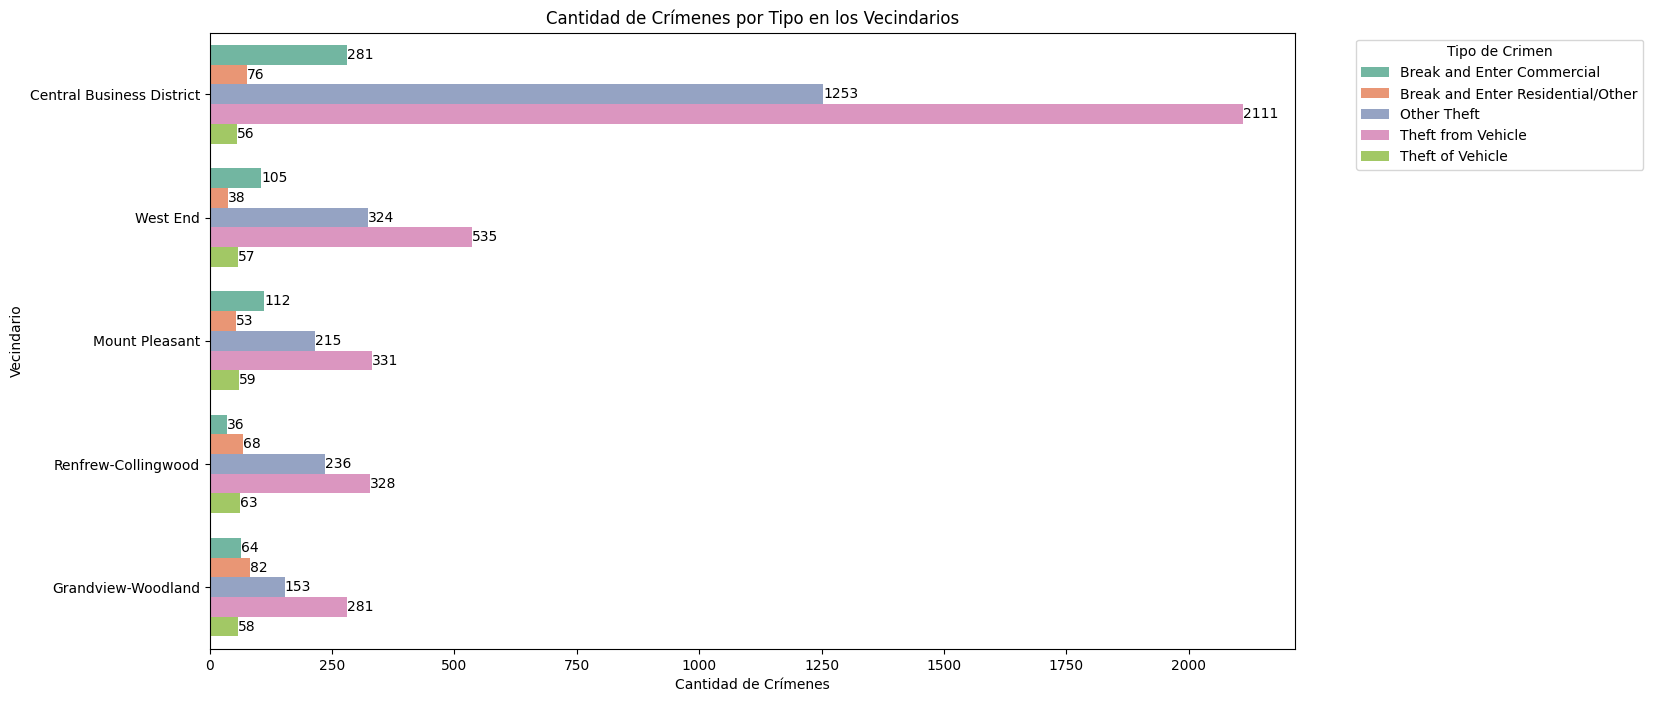

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=crime_counts_long,
    x='COUNT',
    y='NEIGHBOURHOOD',
    hue='TYPE',
    palette='Set2'
)

# Añadir título y etiquetas de los ejes
plt.title('Cantidad de Crímenes por Tipo en los Vecindarios')
plt.xlabel('Cantidad de Crímenes')
plt.ylabel('Vecindario')
plt.legend(title='Tipo de Crimen', bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocar la leyenda fuera del gráfico

# Añadir etiquetas a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')  # Mostrar las etiquetas al final de cada barra

# Mostrar el gráfico
plt.show()


In [78]:
crime_counts_long.to_excel('./datasets/excel.xlsx')

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_6616\284769002.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_6616\284769002.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_6616\284769002.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_6616\284769002.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_x

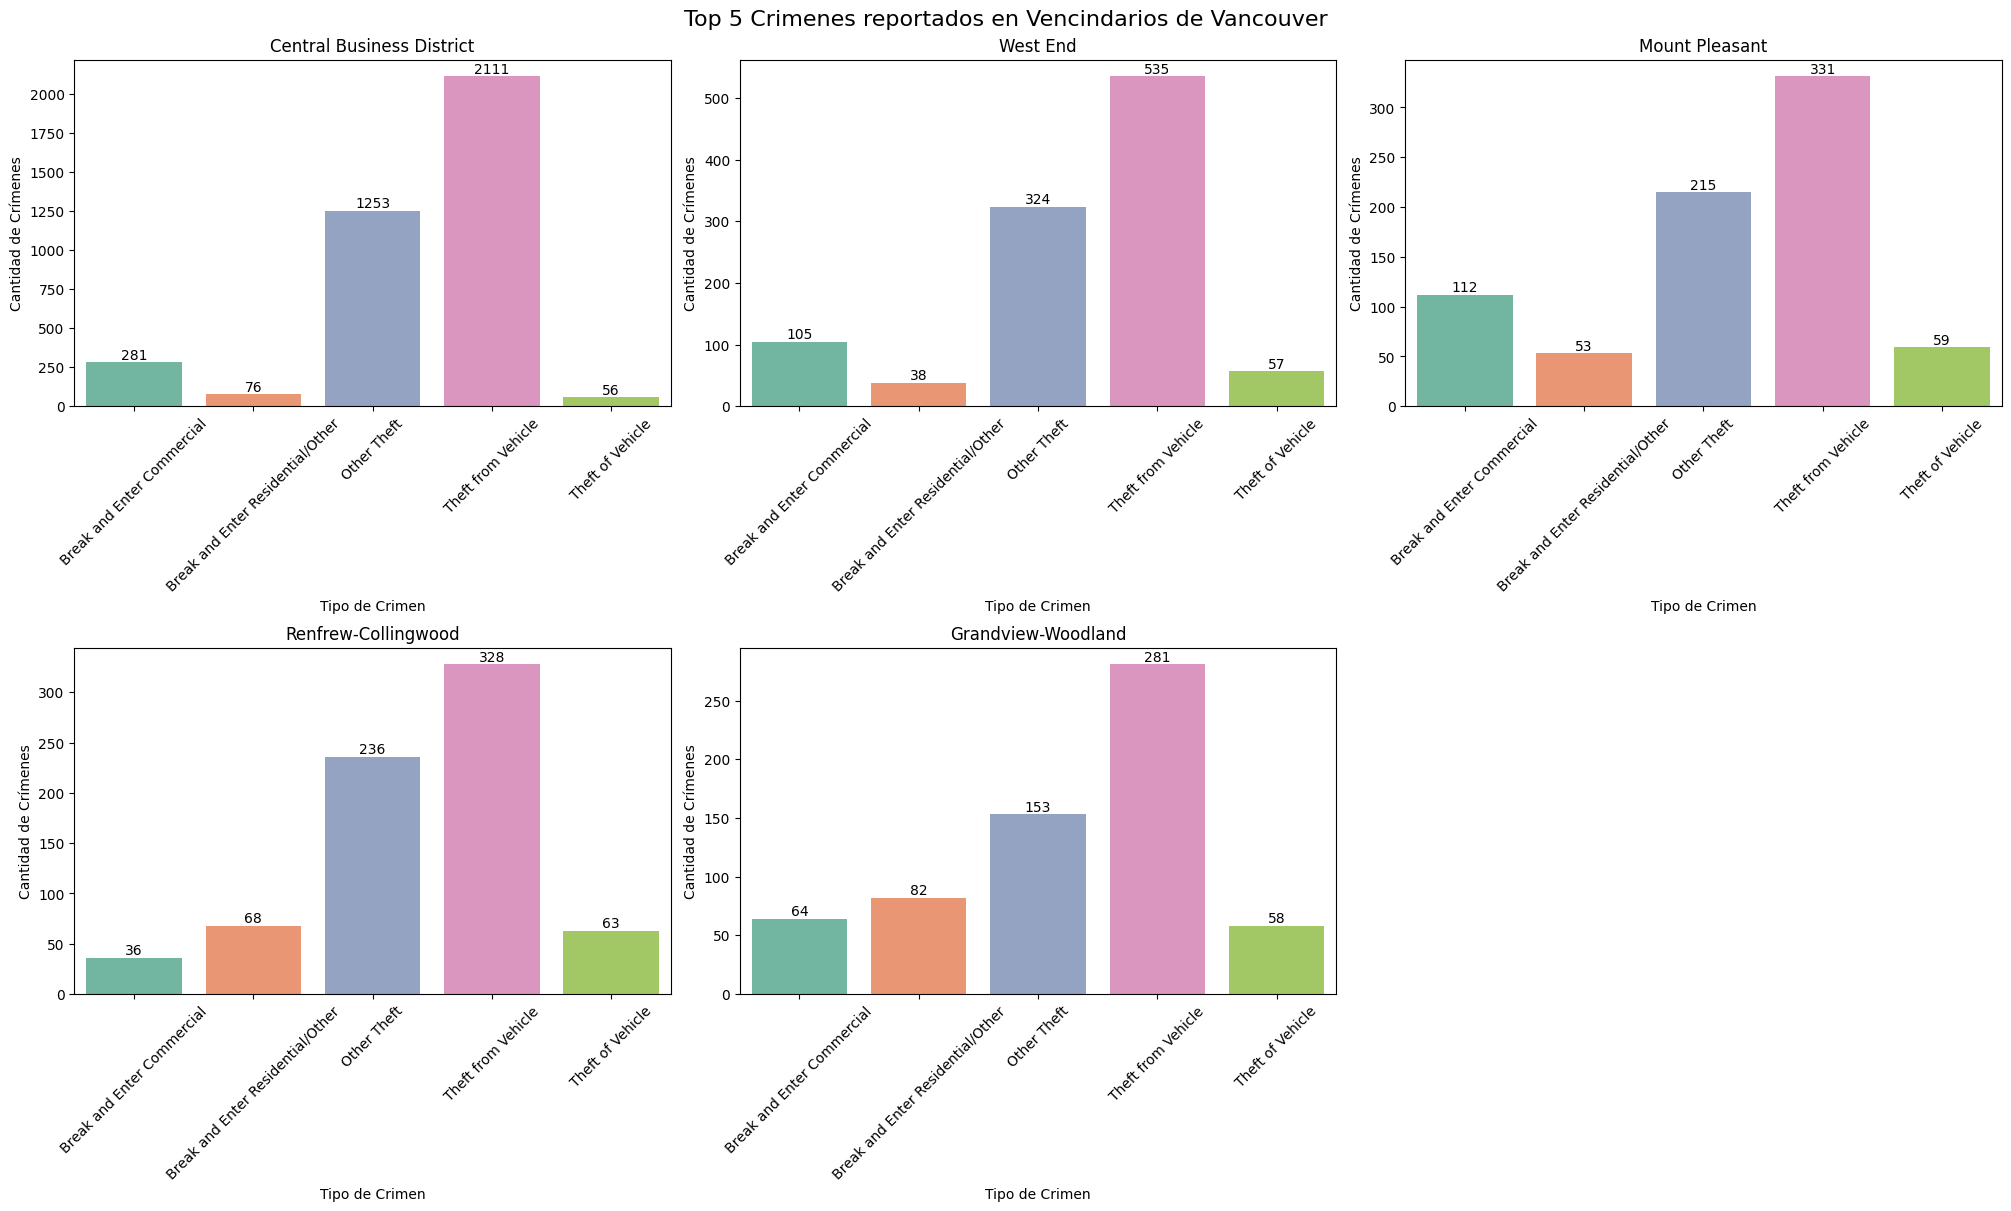

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la lista de vecindarios únicos
neighbourhoods = crime_counts_long['NEIGHBOURHOOD'].unique()

# Determinar el número de filas y columnas para la disposición de subplots
num_neighbourhoods = len(neighbourhoods)
cols = 3  # Número de columnas deseado
rows = (num_neighbourhoods + cols - 1) // cols  # Calcular el número de filas necesario

# Crear la figura y los subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6), constrained_layout=True)
axes = axes.flatten()  # Aplanar el arreglo de ejes para facilitar la iteración

# Crear un gráfico para cada vecindario en su subplot correspondiente
for i, neighbourhood in enumerate(neighbourhoods):
    # Filtrar los datos para el vecindario actual
    data = crime_counts_long[crime_counts_long['NEIGHBOURHOOD'] == neighbourhood]
    
    # Crear el gráfico de barras en el subplot correspondiente
    ax = sns.barplot(
        data=data,
        x='TYPE',
        y='COUNT',
        palette='Set2',
        ax=axes[i]
    )
    
    # Añadir título y etiquetas de ejes
    ax.set_title(f'{neighbourhood}')
    ax.set_xlabel('Tipo de Crimen')
    ax.set_ylabel('Cantidad de Crímenes')
    
    # Añadir etiquetas a cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
    
    # Rotar etiquetas del eje x si es necesario
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Ocultar los subplots vacíos si hay alguno
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Mostrar la imagen completa con todos los subplots
plt.suptitle('Top 5 Crimenes reportados en Vencindarios de Vancouver', fontsize=16)
plt.show()


C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_6616\252719722.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_6616\252719722.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_6616\252719722.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_6616\252719722.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y`

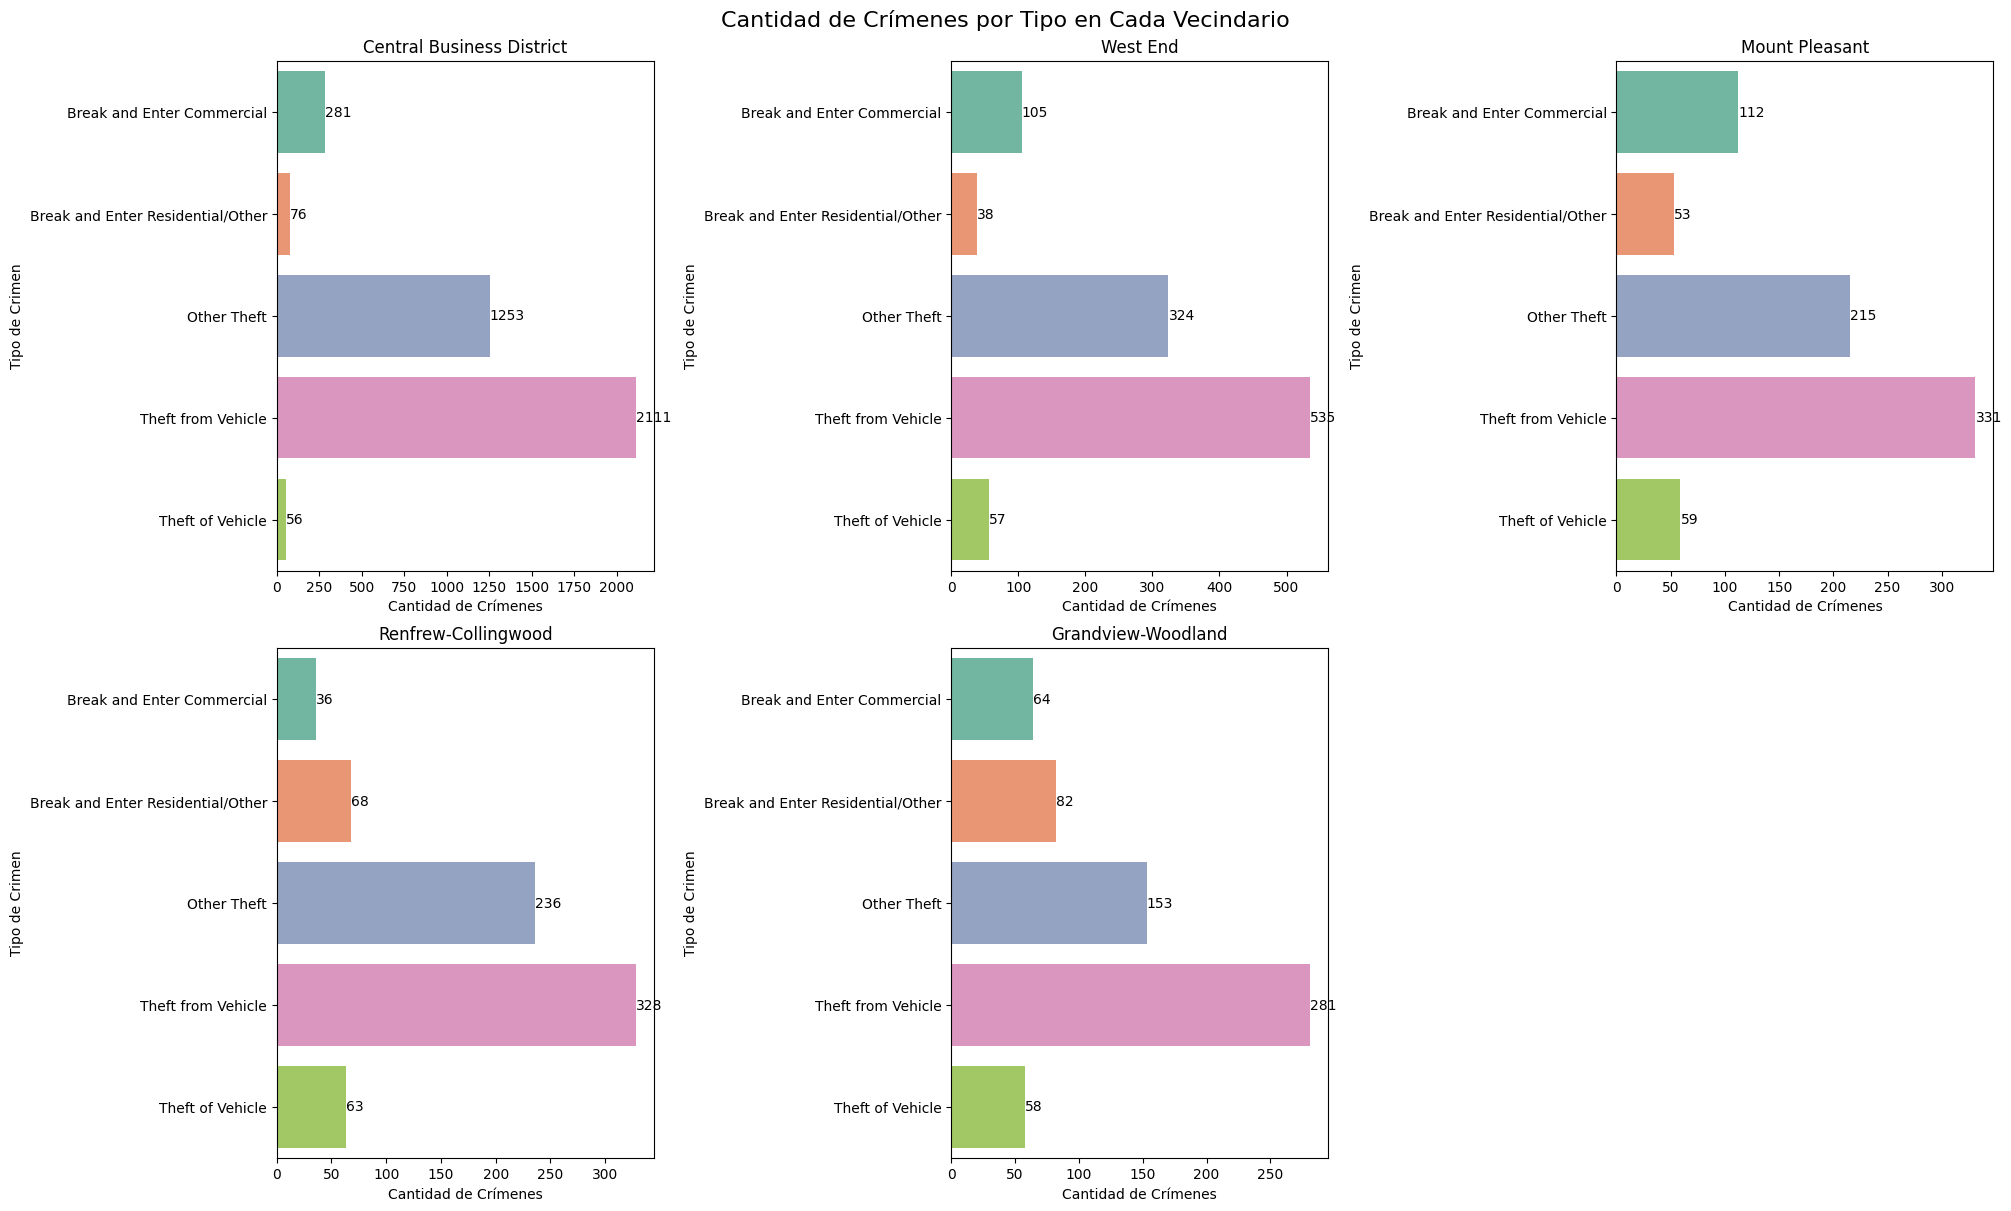

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la lista de vecindarios únicos
neighbourhoods = crime_counts_long['NEIGHBOURHOOD'].unique()

# Determinar el número de filas y columnas para la disposición de subplots
num_neighbourhoods = len(neighbourhoods)
cols = 3  # Número de columnas deseado
rows = (num_neighbourhoods + cols - 1) // cols  # Calcular el número de filas necesario

# Crear la figura y los subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6), constrained_layout=True)
axes = axes.flatten()  # Aplanar el arreglo de ejes para facilitar la iteración

# Crear un gráfico para cada vecindario en su subplot correspondiente
for i, neighbourhood in enumerate(neighbourhoods):
    # Filtrar los datos para el vecindario actual
    data = crime_counts_long[crime_counts_long['NEIGHBOURHOOD'] == neighbourhood]
    
    # Crear el gráfico de barras horizontal en el subplot correspondiente
    ax = sns.barplot(
        data=data,
        y='TYPE',
        x='COUNT',
        palette='Set2',
        ax=axes[i]
    )
    
    # Añadir título y etiquetas de ejes
    ax.set_title(f'{neighbourhood}')
    ax.set_ylabel('Tipo de Crimen')
    ax.set_xlabel('Cantidad de Crímenes')
    
    # Añadir etiquetas a cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
    
# Ocultar los subplots vacíos si hay alguno
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Mostrar la imagen completa con todos los subplots
plt.suptitle('Cantidad de Crímenes por Tipo en Cada Vecindario', fontsize=16)
plt.show()


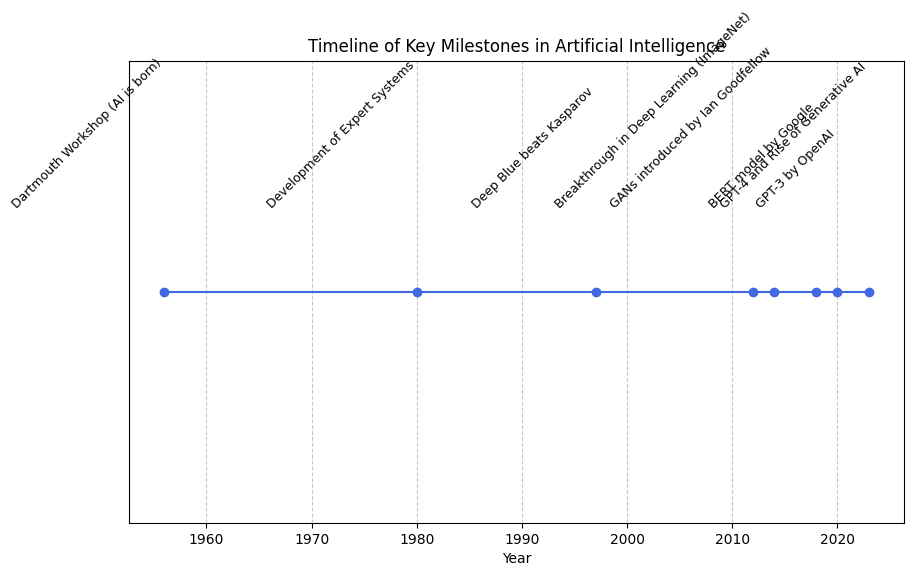

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame ficticio con hitos en inteligencia artificial
data = {
    'Year': [1956, 1980, 1997, 2012, 2014, 2018, 2020, 2023],
    'Milestone': [
        'Dartmouth Workshop (AI is born)',
        'Development of Expert Systems',
        'Deep Blue beats Kasparov',
        'Breakthrough in Deep Learning (ImageNet)',
        'GANs introduced by Ian Goodfellow',
        'BERT model by Google',
        'GPT-3 by OpenAI',
        'GPT-4 and Rise of Generative AI'
    ]
}

# Convertir el DataFrame
df = pd.DataFrame(data)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], [1]*len(df), 'o-', color='royalblue')  # Línea y puntos

# Añadir los hitos como anotaciones
for i, row in df.iterrows():
    plt.text(row['Year'], 1.02, row['Milestone'], rotation=45, ha='right', fontsize=9)

# Ajustar etiquetas y título
plt.xlabel('Year')
plt.yticks([])  # Ocultar eje y
plt.title('Timeline of Key Milestones in Artificial Intelligence')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Añadir una cuadrícula vertical

plt.show()
